# CNN for image recognition

#### NASSE A. Martin

#   
Link for dataset: https://www.kaggle.com/c/dogs-vs-cats/data

#   
#   
### 1. Import packages



In [2]:
# Standard libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Libraries for image manipulation
import cv2

# Libraries for deep learning models
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Dense
from keras.models import load_model
from keras.preprocessing import image

#   
#   
### 2. See examples of the training data



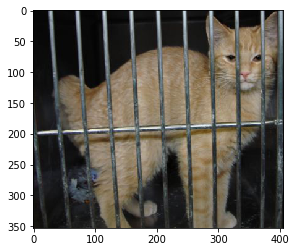

In [9]:
cat=Image.open("CATS_DOGS/Train/CAT/15.jpg")
plt.imshow(cat)

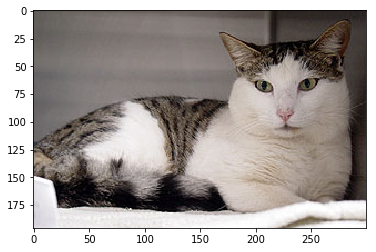

In [10]:
cat=Image.open("CATS_DOGS/Train/CAT/50.jpg")
plt.imshow(cat)

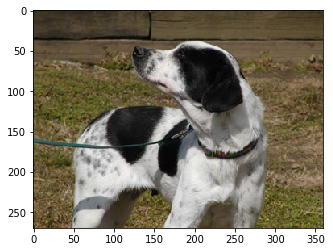

In [20]:
cat=Image.open("CATS_DOGS/Train/DOG/2366.jpg")
plt.imshow(cat)

#   
#   
### 3. Create our CNN architecture



In [55]:
model =Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(128,128,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),  activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),  activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dropout(0.3))

model.add(Dense(1))

model.add(Activation("sigmoid"))

model.compile(loss='binary_crossentropy',optimizer="adam",
              metrics=["acc"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
__________

#   
#   
### 4. Generate batch and train the model


In [57]:
batch_size=64

image_generator=ImageDataGenerator(rotation_range=25,
                            width_shift_range=0.15,
                            height_shift_range=0.15,
                            rescale=1/255,
                            shear_range=0.25,
                            zoom_range=0.15,
                            horizontal_flip=True,
                            fill_mode="nearest")

train=image_generator.flow_from_directory("CATS_DOGS/train",
                                             target_size=(128,128),
                                             batch_size=batch_size,
                                             class_mode="binary")

test=image_generator.flow_from_directory("CATS_DOGS/test",
                                             target_size=(128,128),
                                             batch_size=batch_size,
                                             class_mode="binary")

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [58]:
res=model.fit_generator(train, epochs=20, steps_per_epoch=10,
                           validation_data=test,
                           validation_steps=12)

Epoch 1/20
10/10 [==============================] - 62s 6s/step - loss: 0.6911 - acc: 0.5469 - val_loss: 0.6923 - val_acc: 0.5316
Epoch 2/20
10/10 [==============================] - 86s 9s/step - loss: 0.6933 - acc: 0.5047 - val_loss: 0.6920 - val_acc: 0.5669
Epoch 3/20
 6/10 [=================>............] - ETA: 4s - loss: 0.6920 - acc: 0.5573

D:\Programmes\Anaconda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag))
D:\Programmes\Anaconda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag))
D:\Programmes\Anaconda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag))
D:\Programmes\Anaconda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag))
D:\Programmes\Anaconda\envs\python-cvcourse\lib

10/10 [==============================] - 58s 6s/step - loss: 0.6919 - acc: 0.5563 - val_loss: 0.6905 - val_acc: 0.5802
Epoch 4/20
10/10 [==============================] - 86s 9s/step - loss: 0.6920 - acc: 0.5078 - val_loss: 0.6875 - val_acc: 0.5737
Epoch 5/20
10/10 [==============================] - 57s 6s/step - loss: 0.6957 - acc: 0.5281 - val_loss: 0.6945 - val_acc: 0.5001
Epoch 6/20
10/10 [==============================] - 86s 9s/step - loss: 0.6947 - acc: 0.4781 - val_loss: 0.6930 - val_acc: 0.5001
Epoch 7/20
 9/10 [==========================>...] - ETA: 1s - loss: 0.6929 - acc: 0.4983

D:\Programmes\Anaconda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18350080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
D:\Programmes\Anaconda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:764: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


10/10 [==============================] - 57s 6s/step - loss: 0.6927 - acc: 0.5078 - val_loss: 0.6927 - val_acc: 0.5004
Epoch 8/20
10/10 [==============================] - 86s 9s/step - loss: 0.6932 - acc: 0.4656 - val_loss: 0.6921 - val_acc: 0.5002
Epoch 9/20
10/10 [==============================] - 57s 6s/step - loss: 0.6904 - acc: 0.5047 - val_loss: 0.6892 - val_acc: 0.5009
Epoch 10/20
 9/10 [==========================>...] - ETA: 1s - loss: 0.6917 - acc: 0.5087

D:\Programmes\Anaconda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
D:\Programmes\Anaconda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
D:\Programmes\Anaconda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
D:\Programmes\Anaconda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
D:\Programmes\Anaconda\envs\

10/10 [==============================] - 58s 6s/step - loss: 0.6919 - acc: 0.5031 - val_loss: 0.6908 - val_acc: 0.5292
Epoch 11/20
 4/10 [===========>..................] - ETA: 9s - loss: 0.6905 - acc: 0.5312 

D:\Programmes\Anaconda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307363840 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
D:\Programmes\Anaconda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307888128 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
D:\Programmes\Anaconda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 328728576 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
D:\Programmes\Anaconda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 5357. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
D:\Programmes\Anacond

10/10 [==============================] - 117s 12s/step - loss: 0.6896 - acc: 0.5484 - val_loss: 0.6846 - val_acc: 0.5834
Epoch 12/20
10/10 [==============================] - 62s 6s/step - loss: 0.6848 - acc: 0.5503 - val_loss: 0.6886 - val_acc: 0.5217
Epoch 13/20
 9/10 [==========================>...] - ETA: 1s - loss: 0.6772 - acc: 0.5660

D:\Programmes\Anaconda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262146 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
D:\Programmes\Anaconda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262151 bytes but only got 0. Skipping tag 56
  " Skipping tag %s" % (size, len(data), tag))
D:\Programmes\Anaconda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:764: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))


10/10 [==============================] - 57s 6s/step - loss: 0.6782 - acc: 0.5641 - val_loss: 0.6725 - val_acc: 0.6101
Epoch 14/20
10/10 [==============================] - 57s 6s/step - loss: 0.6845 - acc: 0.5750 - val_loss: 0.6691 - val_acc: 0.5612
Epoch 15/20
10/10 [==============================] - 57s 6s/step - loss: 0.6720 - acc: 0.5797 - val_loss: 0.6815 - val_acc: 0.5374
Epoch 16/20
10/10 [==============================] - 85s 9s/step - loss: 0.6639 - acc: 0.5641 - val_loss: 0.6522 - val_acc: 0.6097
Epoch 17/20
10/10 [==============================] - 57s 6s/step - loss: 0.6468 - acc: 0.6266 - val_loss: 0.6380 - val_acc: 0.6418
Epoch 18/20
 4/10 [===========>..................] - ETA: 9s - loss: 0.6525 - acc: 0.6328 

D:\Programmes\Anaconda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 209715200 bytes but only got 0. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
D:\Programmes\Anaconda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 52428800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
D:\Programmes\Anaconda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6468665344 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
D:\Programmes\Anaconda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 7027. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
D:\Programmes\Anacond

10/10 [==============================] - 86s 9s/step - loss: 0.6639 - acc: 0.6141 - val_loss: 0.7063 - val_acc: 0.5276
Epoch 19/20
10/10 [==============================] - 57s 6s/step - loss: 0.6769 - acc: 0.5922 - val_loss: 0.6828 - val_acc: 0.5343
Epoch 20/20
10/10 [==============================] - 85s 9s/step - loss: 0.6757 - acc: 0.5844 - val_loss: 0.6576 - val_acc: 0.6353


#   
#   
### 5. Make prediction from trained model


In [68]:
# Prepare the data for the prediction
def image_preparation(file):
    img=image.load_img(file, target_size=(128,128))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=img/255
    return img

# Prediction function
def prediction(model, image):
    image=image_preparation(image)
    pred= class_indices[model.predict_classes(image)[0][0]]
    proba=model.predict(image)[0][0]
    return pred,proba
    
# Associate the label to the prediction
class_indices= {train.class_indices["CAT"]:"CAT", train.class_indices["DOG"]:"DOG"}


Prediction:   DOG  | Probability:  59.0 %


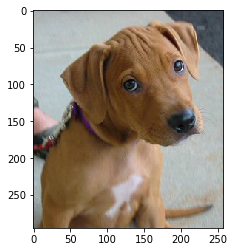

In [78]:
file="CATS_DOGS/test/DOG/10126.jpg"
img=Image.open(file)
plt.imshow(img)
predictions=prediction(model, file)
print("Prediction:  ",predictions[0]," | Probability: ",str(round(predictions[1]*100,0)),"%")

Prediction:   CAT  | Probability:  55.0 %


('CAT', 0.44634357)

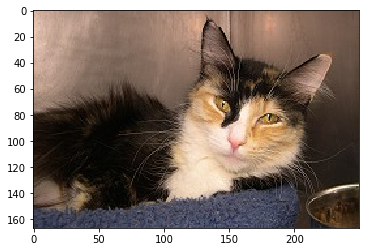

In [76]:
file="CATS_DOGS/test/CAT/10012.jpg"
img=Image.open(file)
plt.imshow(img)
predictions=prediction(model, file)
print("Prediction:  ",predictions[0]," | Probability: ",str(round((1-predictions[1])*100,0)),"%")


#   
#   
### 6. Improve performance

- **Increase epochs: Here we have have just used 10 epochs for fast training but for a production model increase the epochs**
- Increase models architecture
- Use data augmentation to increase training sample
